In [56]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
from statsmodels.api import OLS
from statsmodels.api import add_constant
import seaborn as sns
from statsmodels.discrete.discrete_model import Poisson

%matplotlib inline

# Question 1 - how much water does reservoir contain?


In [12]:
file_path = '/Volumes/Seagate Backup Plus Drive/connected_worlds/2017-09-19/'
file_names = [
    '10-01-14-Free_Play/log-0-Free_Play_Session.csv',
    '10-30-06-Free_Play_Easy/log-0-Easy_Session.csv',
    '10-42-52-ESSIL_groundtruth/log-0-Main.csv',
    '11-01-47-Free_Play_Easy/log-0-Easy_Session.csv',
    '11-33-19-Free_Play_Super_Easy/log-0-Free_Play_Session.csv',
    '12-48-25-Free_Play_Super_Easy/log-0-Free_Play_Session.csv',
    '14-49-03-ESSIL_groundtruth/log-0-Main.csv',
    '14-53-13-ESSIL_groundtruth/log-0-Main.csv',
    '15-06-15-ESSIL_groundtruth/log-0-Main.csv',
    '15-16-53-ESSIL_groundtruth/log-0-Main.csv',
    '15-20-23-Free_Play_Easy/log-0-Easy_Session.csv',
    '16-09-25-Free_Play_Easy/log-0-Easy_Session.csv',
]

In [13]:
pds = [pd.read_csv(file_path + f) for f in file_names]

dfs = []
for df in pds:
    df.columns = df.columns.str.strip()
    dfs.append(df.ix[1:])

In [14]:
for f,df in zip(file_names,dfs):
    max_water = df.Total_Water.max()
    max_water_in_reservoir = df.Reservoir_Water.max()
    print('f_name = {}'.format(f))
    print('n_rows = {}, For Total_Water = {}, Reservoir Contains a Max of: {}'.format(df.shape[0], max_water, max_water_in_reservoir))
    print()

f_name = 10-01-14-Free_Play/log-0-Free_Play_Session.csv
n_rows = 1427, For Total_Water = 2.5, Reservoir Contains a Max of: 0.54673

f_name = 10-30-06-Free_Play_Easy/log-0-Easy_Session.csv
n_rows = 632, For Total_Water = 4, Reservoir Contains a Max of: 0.6032420000000001

f_name = 10-42-52-ESSIL_groundtruth/log-0-Main.csv
n_rows = 752, For Total_Water = 4, Reservoir Contains a Max of: 0.546733

f_name = 11-01-47-Free_Play_Easy/log-0-Easy_Session.csv
n_rows = 741, For Total_Water = 4, Reservoir Contains a Max of: 0.48756000000000005

f_name = 11-33-19-Free_Play_Super_Easy/log-0-Free_Play_Session.csv
n_rows = 748, For Total_Water = 6, Reservoir Contains a Max of: 0.627404

f_name = 12-48-25-Free_Play_Super_Easy/log-0-Free_Play_Session.csv
n_rows = 731, For Total_Water = 6, Reservoir Contains a Max of: 0.5714199999999999

f_name = 14-49-03-ESSIL_groundtruth/log-0-Main.csv
n_rows = 204, For Total_Water = 4, Reservoir Contains a Max of: 0.45

f_name = 14-53-13-ESSIL_groundtruth/log-0-Main.cs

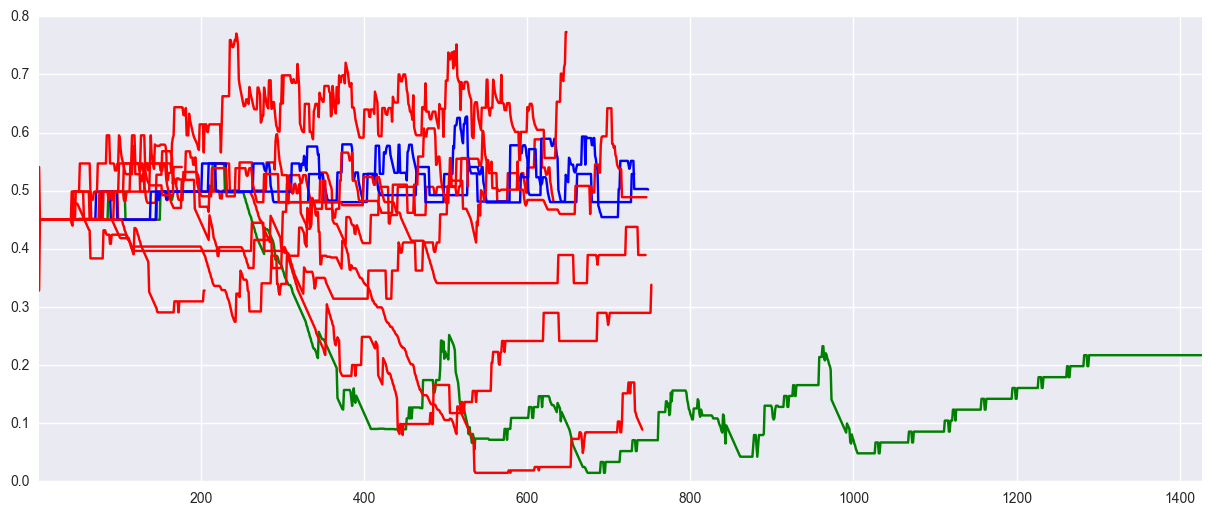

In [15]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

c = {
    4: 'r',
    2.5: 'g',
    6: 'b'
}

for f,df in zip(file_names,dfs):
    max_water = df.Total_Water.max()
    df.Reservoir_Water.plot(ax=ax, c=c[max_water], label=f)
    
# plt.legend()

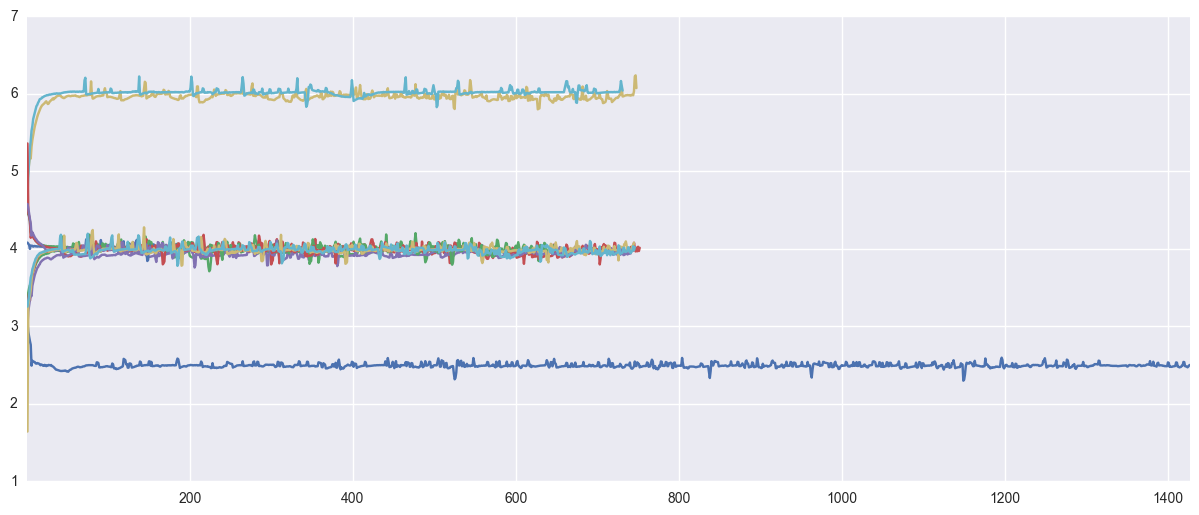

In [16]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

for df in dfs:
    
    df[df.columns[df.columns.str.contains('_Water') & ~df.columns.str.contains('Total')]].sum(axis=1).plot(ax=ax)

In [17]:
df.columns[df.columns.str.contains('_Water')]

Index(['Total_Water', 'Desert_Water', 'MountainValley_Water', 'Plains_Water',
       'Waterfall_Water', 'Floor_Water', 'Jungle_Water', 'Reservoir_Water',
       'Wetlands_Water', 'Desert_WaterBins', 'MountainValley_WaterBins',
       'Plains_WaterBins', 'Jungle_WaterBins', 'Reservoir_WaterBins',
       'Wetlands_WaterBins'],
      dtype='object')

Notes:
 - The water level itself is noisy but it is not a disaster.
 - The amount of water that the reservoir can hold is constant. This means it has a much greater effect on the lower water games than on the higher water games.
 - The water in the clouds is not logged.

# Question 2 - How much water is used by the automatic expulsion of the plug slug?

A - as much as it rains, this can be as much as 0.05.

# Question 3 - How much water does the water dropper move:

0.018759899999999996


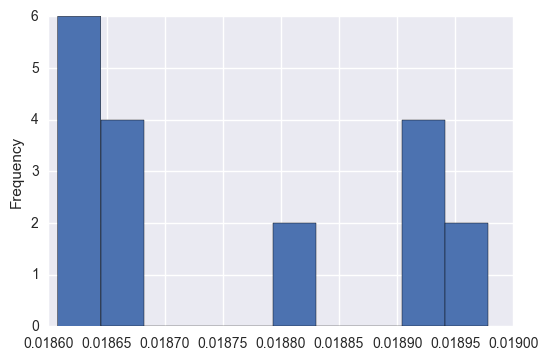

In [18]:
diff = dfs[0].Reservoir_Water.ix[1000:].diff()
diff[diff > 0].plot(kind='hist')
print(diff[diff > 0].mean())

A approximately 0.0187

### What about the water in the reservoir - given all of the data:

In [19]:
water_level = []
max_reservoir_level = []

path = '/Volumes/Seagate Backup Plus Drive/connected_worlds'
for f1 in os.listdir(path):
    
    if not os.path.isdir(os.path.join(path, f1)):
        continue
        
    path2 = os.path.join(path, f1)
    for f2 in os.listdir(path2):
            
        if not os.path.isdir(os.path.join(path2, f2)):
            continue
        
        path3 = os.path.join(path2, f2)
        for f3 in os.listdir(path3):
            
            if not '.csv' in f3:
                continue
                
            df = pd.read_csv(os.path.join(path3, f3))
            
            if df.shape[0] < 500:
                continue
            df.columns = df.columns.str.strip()
            water = df.Total_Water.mean()
            max_water_in_reservoir = df.Reservoir_Water.max()
            
            water_level.append(water)
            max_reservoir_level.append(max_water_in_reservoir)

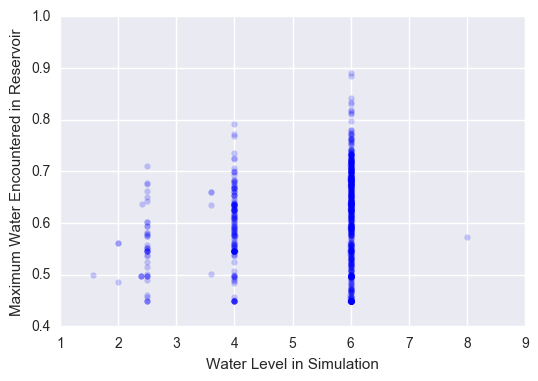

In [20]:
plt.scatter(water_level, max_reservoir_level, alpha=0.2, lw=0)
plt.xlabel('Water Level in Simulation')
plt.ylabel('Maximum Water Encountered in Reservoir')
plt.show()

# Can trees be linked to a higher water consumption

**Assumption**: there is a carrying capacity for the total number of trees that a biome can support for any given water level $num\_trees$. Therefore $num\_trees = water\_level \times trees\_per\_water$ and $trees\_per\_water$ can be written as a linear combination of $beta_1 \times lv1/water$, $beta_1 \times lv2/water$, $beta_1 \times lv3/water$ and $beta_1 \times lv4/water$ trees

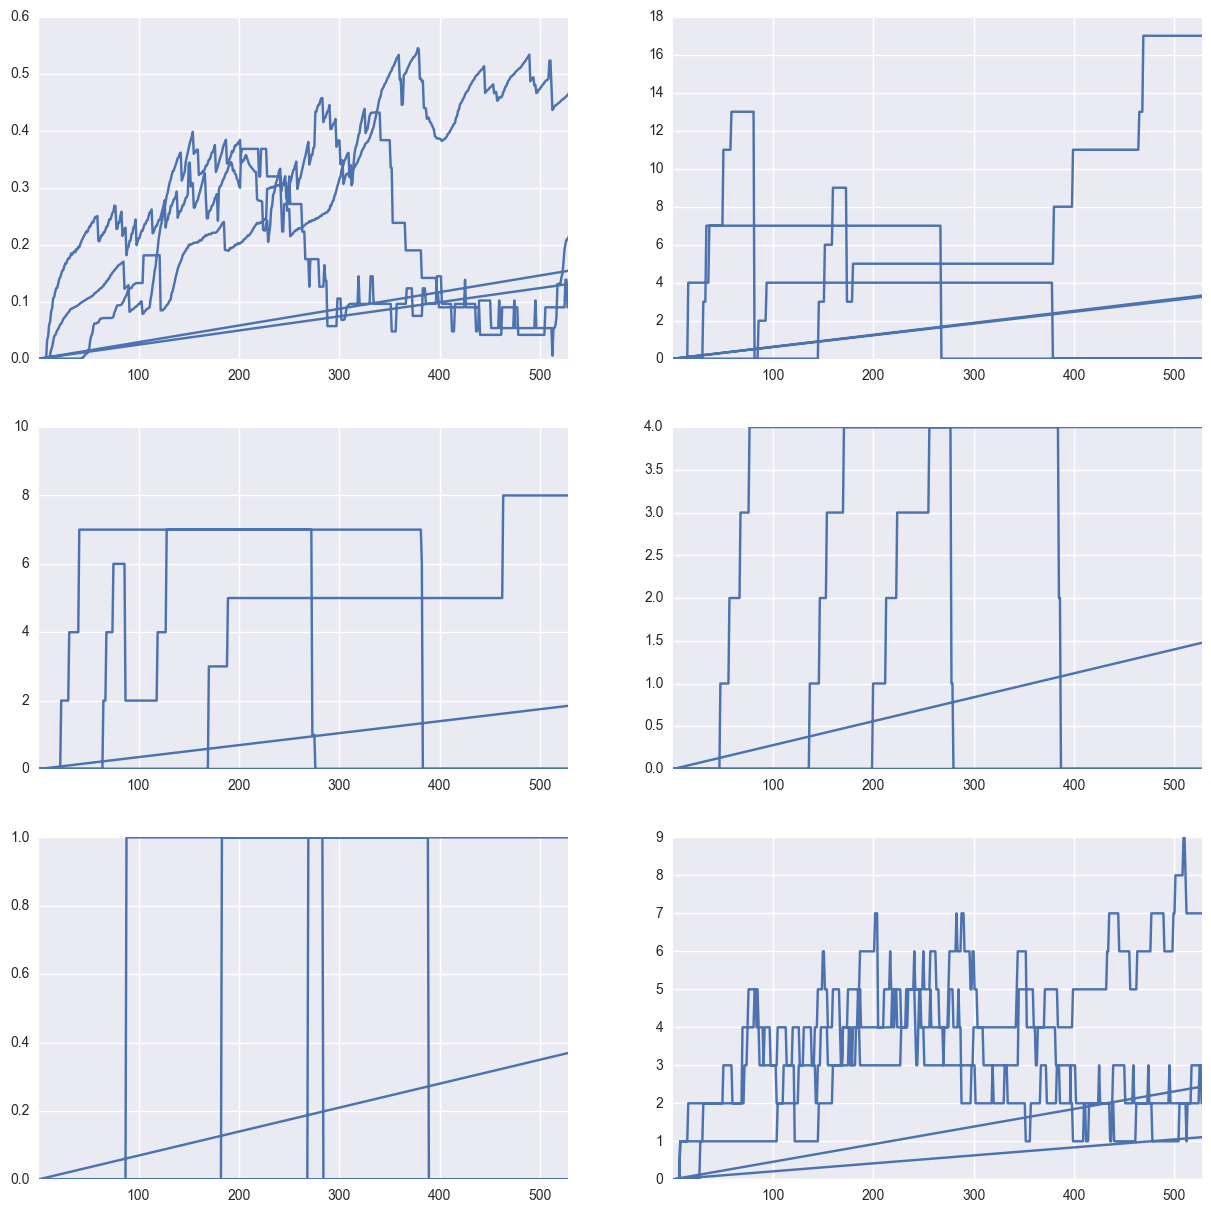

In [21]:
df = pd.concat([pd[1:] for pd in pds if (pd.Jungle_Water.iloc[1] < 0.25 and pd.shape[0] > 500)], axis=0)
fig, axes = plt.subplots(3,2,figsize=(15,15))
axes = axes.flatten()

df.Jungle_Water.plot(ax=axes[0])
df.Jungle_lv1.plot(ax=axes[1])
df.Jungle_lv2.plot(ax=axes[2])
df.Jungle_lv3.plot(ax=axes[3])
df.Jungle_lv4.plot(ax=axes[4])
df.Jungle_Clouds.plot(ax=axes[5])

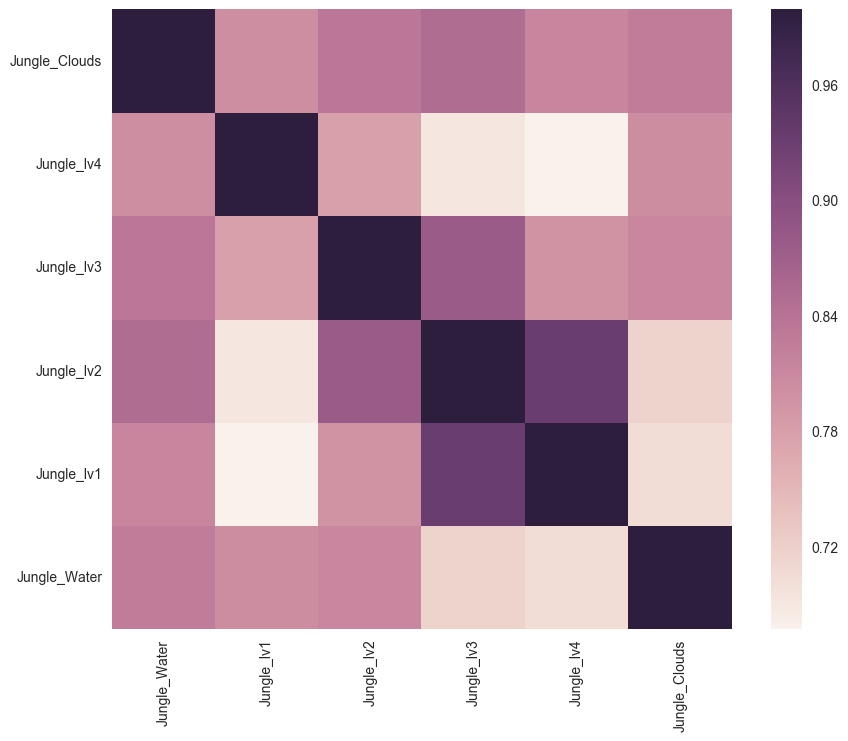

In [22]:
arr = np.array([df.Jungle_Water, df.Jungle_lv1, df.Jungle_lv2, df.Jungle_lv3, df.Jungle_lv4, df.Jungle_Clouds])
corr = np.corrcoef(arr)
l = ['Jungle_Water', 'Jungle_lv1', 'Jungle_lv2', 'Jungle_lv3', 'Jungle_lv4', 'Jungle_Clouds']

fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(corr, ax=ax)
ax.set_xticklabels(l, rotation='vertical')
ax.set_yticklabels(l, rotation='horizontal')
plt.show()

In [23]:
[p.size for p in pds]

[132804,
 58869,
 70029,
 69006,
 69657,
 68076,
 19065,
 60357,
 49104,
 16461,
 69378,
 69471]

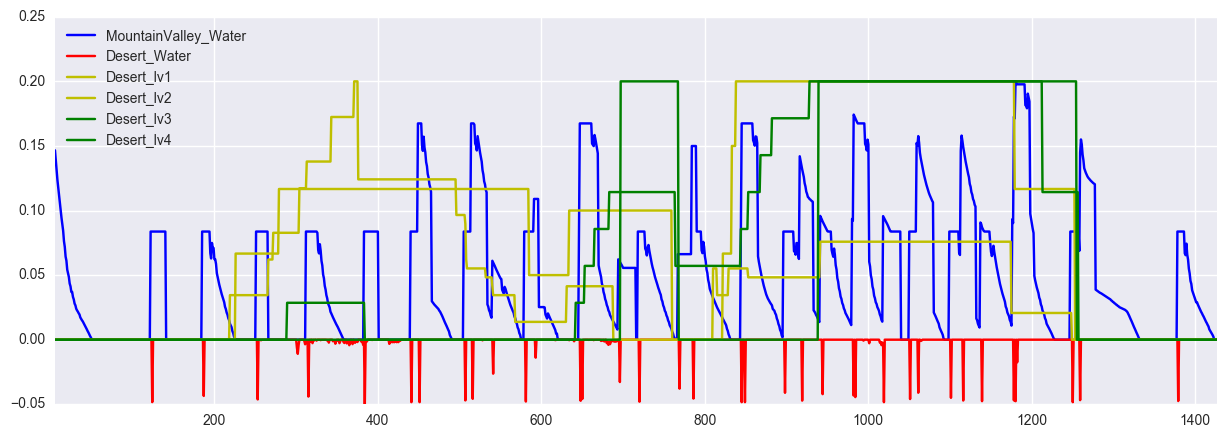

In [24]:
fig, ax=plt.subplots(1,1,figsize=(15,5))
i = 0
(0.2*pds[i][['MountainValley_Water']][5:]/pds[i][['MountainValley_Water']][5:].max()).plot(ax=ax, c='b')
diff = pds[i][['Desert_Water']][5:].diff()
diff[diff>0] = 0
# diff = diff 
diff.plot(ax=ax, c='r')

(0.2*pds[i][['Desert_lv1']][5:]/(pds[i][['Desert_lv1']][5:].max())).plot(ax=ax, c='y')
(0.2*pds[i][['Desert_lv2']][5:]/(pds[i][['Desert_lv2']][5:].max())).plot(ax=ax, c='y')
(0.2*pds[i][['Desert_lv3']][5:]/(pds[i][['Desert_lv3']][5:].max())).plot(ax=ax, c='g')
(0.2*pds[i][['Desert_lv4']][5:]/(pds[i][['Desert_lv4']][5:].max())).plot(ax=ax, c='g')
plt.show()

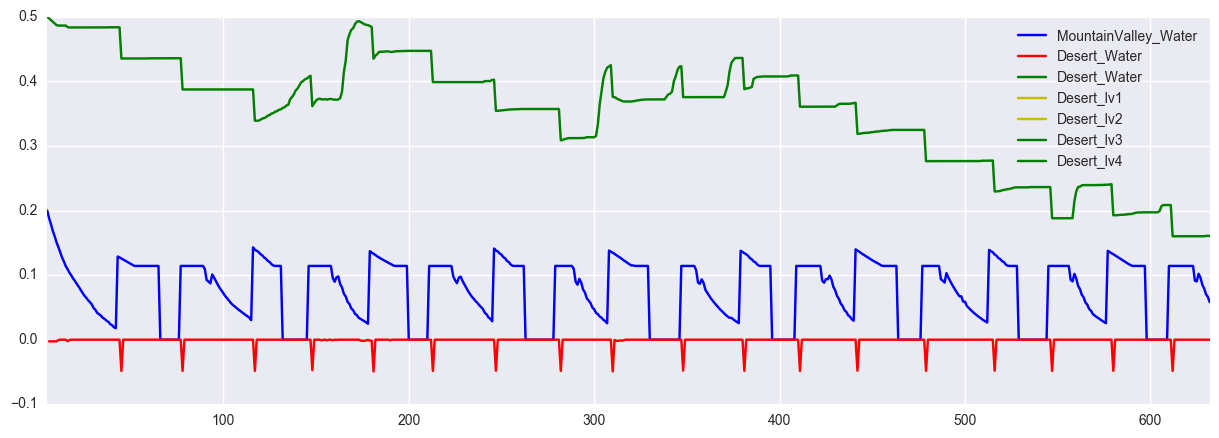

In [25]:
fig, ax=plt.subplots(1,1,figsize=(15,5))
i = 1
(0.2*pds[i][['MountainValley_Water']][5:]/pds[i][['MountainValley_Water']][5:].max()).plot(ax=ax, c='b')
diff = pds[i][['Desert_Water']][5:].diff()
diff[diff>0] = 0
# diff = diff 
diff.plot(ax=ax, c='r')

pds[i][['Desert_Water']][5:].plot(ax=ax, c='g')

(0.2*pds[i][['Desert_lv1']][5:]/(pds[i][['Desert_lv1']][5:].max())).plot(ax=ax, c='y')
(0.2*pds[i][['Desert_lv2']][5:]/(pds[i][['Desert_lv2']][5:].max())).plot(ax=ax, c='y')
(0.2*pds[i][['Desert_lv3']][5:]/(pds[i][['Desert_lv3']][5:].max())).plot(ax=ax, c='g')
(0.2*pds[i][['Desert_lv4']][5:]/(pds[i][['Desert_lv4']][5:].max())).plot(ax=ax, c='g')
plt.show()

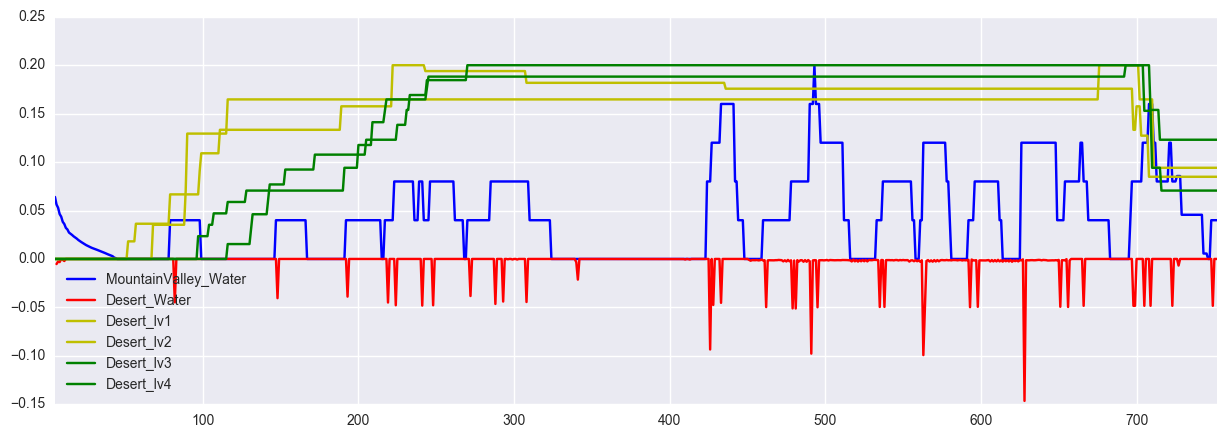

In [26]:
fig, ax=plt.subplots(1,1,figsize=(15,5))
i = 2
(0.2*pds[i][['MountainValley_Water']][5:]/pds[i][['MountainValley_Water']][5:].max()).plot(ax=ax, c='b')
diff = pds[i][['Desert_Water']][5:].diff()
diff[diff>0] = 0
# diff = diff 
diff.plot(ax=ax, c='r')

(0.2*pds[i][['Desert_lv1']][5:]/(pds[i][['Desert_lv1']][5:].max())).plot(ax=ax, c='y')
(0.2*pds[i][['Desert_lv2']][5:]/(pds[i][['Desert_lv2']][5:].max())).plot(ax=ax, c='y')
(0.2*pds[i][['Desert_lv3']][5:]/(pds[i][['Desert_lv3']][5:].max())).plot(ax=ax, c='g')
(0.2*pds[i][['Desert_lv4']][5:]/(pds[i][['Desert_lv4']][5:].max())).plot(ax=ax, c='g')
plt.show()

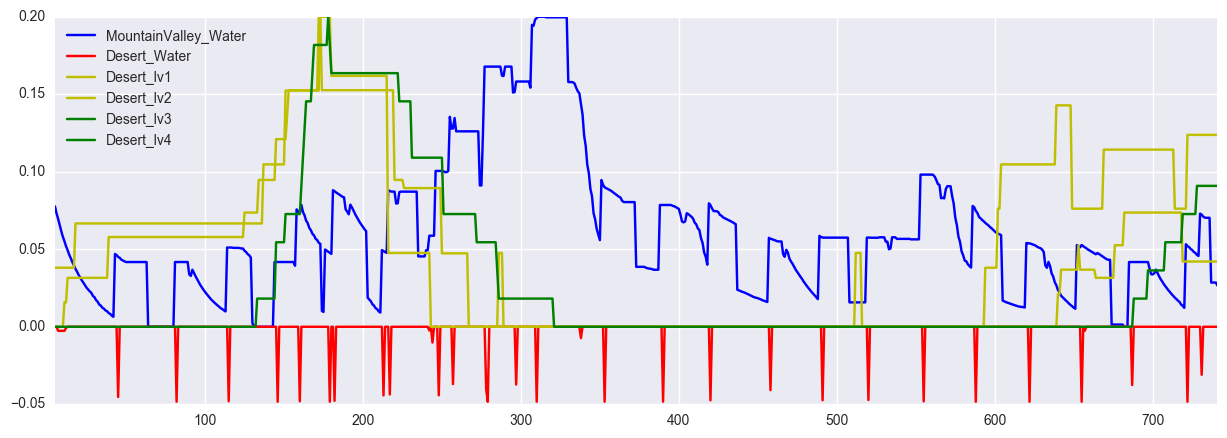

In [27]:
fig, ax=plt.subplots(1,1,figsize=(15,5))
i = 3
(0.2*pds[i][['MountainValley_Water']][5:]/pds[i][['MountainValley_Water']][5:].max()).plot(ax=ax, c='b')
diff = pds[i][['Desert_Water']][5:].diff()
diff[diff>0] = 0
# diff = diff 
diff.plot(ax=ax, c='r')

(0.2*pds[i][['Desert_lv1']][5:]/(pds[i][['Desert_lv1']][5:].max())).plot(ax=ax, c='y')
(0.2*pds[i][['Desert_lv2']][5:]/(pds[i][['Desert_lv2']][5:].max())).plot(ax=ax, c='y')
(0.2*pds[i][['Desert_lv3']][5:]/(pds[i][['Desert_lv3']][5:].max())).plot(ax=ax, c='g')
(0.2*pds[i][['Desert_lv4']][5:]/(pds[i][['Desert_lv4']][5:].max())).plot(ax=ax, c='g')
plt.show()

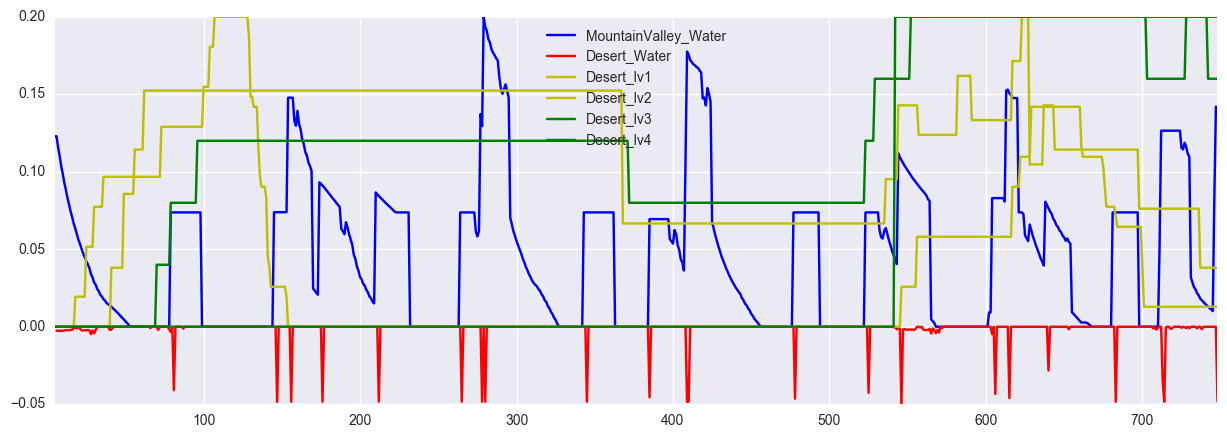

In [28]:
fig, ax=plt.subplots(1,1,figsize=(15,5))
i = 4
(0.2*pds[i][['MountainValley_Water']][5:]/pds[i][['MountainValley_Water']][5:].max()).plot(ax=ax, c='b')
diff = pds[i][['Desert_Water']][5:].diff()
diff[diff>0] = 0
# diff = diff 
diff.plot(ax=ax, c='r')

(0.2*pds[i][['Desert_lv1']][5:]/(pds[i][['Desert_lv1']][5:].max())).plot(ax=ax, c='y')
(0.2*pds[i][['Desert_lv2']][5:]/(pds[i][['Desert_lv2']][5:].max())).plot(ax=ax, c='y')
(0.2*pds[i][['Desert_lv3']][5:]/(pds[i][['Desert_lv3']][5:].max())).plot(ax=ax, c='g')
(0.2*pds[i][['Desert_lv4']][5:]/(pds[i][['Desert_lv4']][5:].max())).plot(ax=ax, c='g')
plt.show()

In [29]:
df = pd.read_csv('/Volumes/Seagate Backup Plus Drive/connected_worlds/2017-09-19/10-42-52-ESSIL_groundtruth/log-0-Main.csv')
df.columns = df.columns.str.strip()

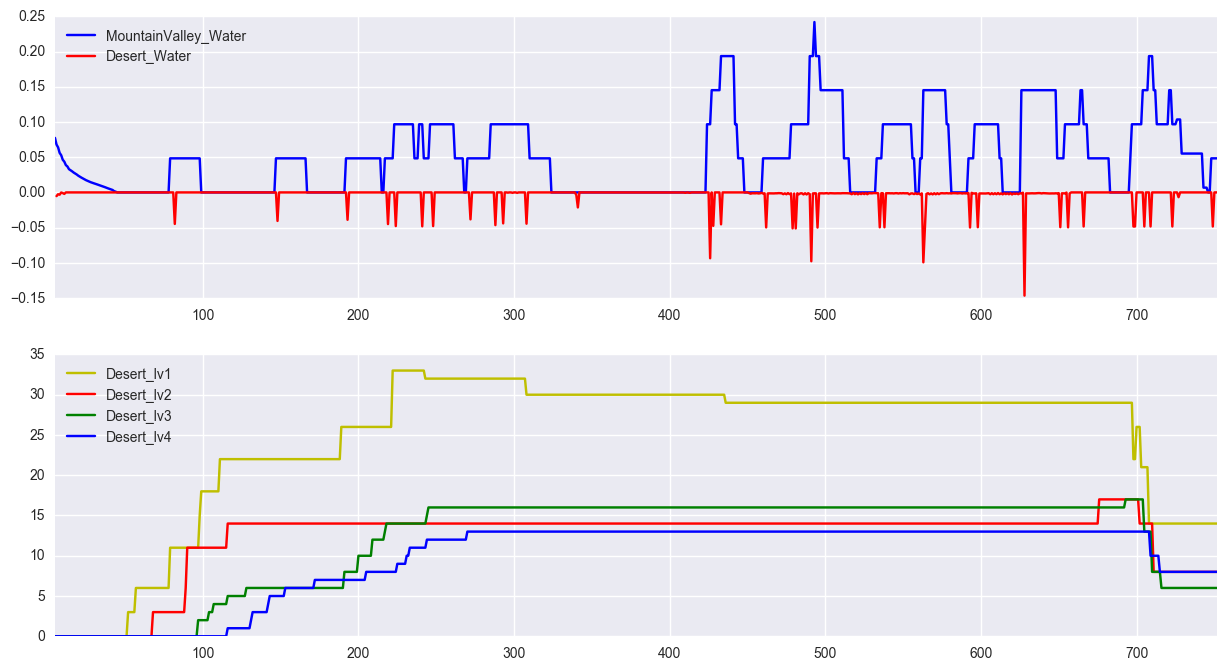

In [30]:
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(15,8))
i = 4
# (0.2*df[['MountainValley_Water']][5:]/df[['MountainValley_Water']][5:].max()).plot(ax=ax, c='b')
# diff = df[['Desert_Water']][5:].diff()
# diff[diff>0] = 0
# # diff = diff 
# diff.plot(ax=ax, c='r')

# ax1=ax.twinx()
# (0.2*df[['Desert_lv1']][5:]/(df[['Desert_lv1']][5:].max())).plot(ax=ax, c='y')
# (0.2*df[['Desert_lv2']][5:]/(df[['Desert_lv2']][5:].max())).plot(ax=ax, c='y')
# (0.2*df[['Desert_lv3']][5:]/(df[['Desert_lv3']][5:].max())).plot(ax=ax, c='g')
# (0.2*df[['Desert_lv4']][5:]/(df[['Desert_lv4']][5:].max())).plot(ax=ax, c='g')
# plt.show()
(df[['MountainValley_Water']][5:]).plot(ax=ax1, c='b')
diff = df[['Desert_Water']][5:].diff()
diff[diff>0] = 0
# diff = diff 
diff.plot(ax=ax1, c='r')

(df[['Desert_lv1']][5:]).plot(ax=ax2, c='y')
(df[['Desert_lv2']][5:]).plot(ax=ax2, c='r')
(df[['Desert_lv3']][5:]).plot(ax=ax2, c='g')
(df[['Desert_lv4']][5:]).plot(ax=ax2, c='b')
plt.show()

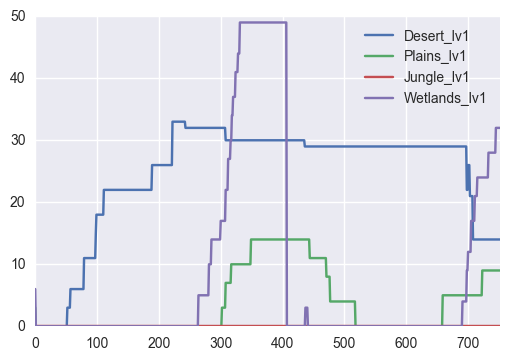

In [31]:
df[df.columns[df.columns.str.contains('lv1') & ~df.columns.str.contains('Dead')]].plot()

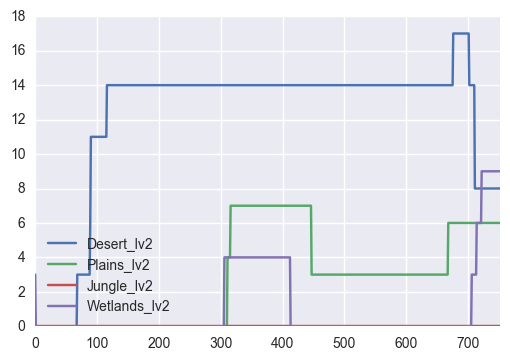

In [32]:
df[df.columns[df.columns.str.contains('lv2') & ~df.columns.str.contains('Dead')]].plot()

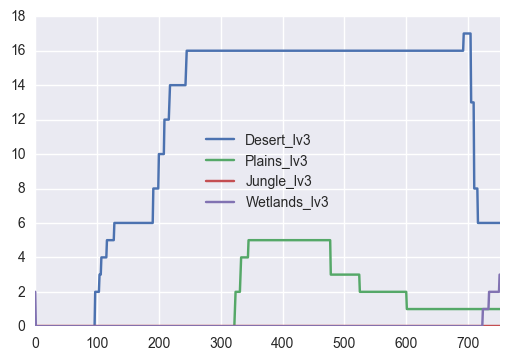

In [33]:
df[df.columns[df.columns.str.contains('lv3') & ~df.columns.str.contains('Dead')]].plot()

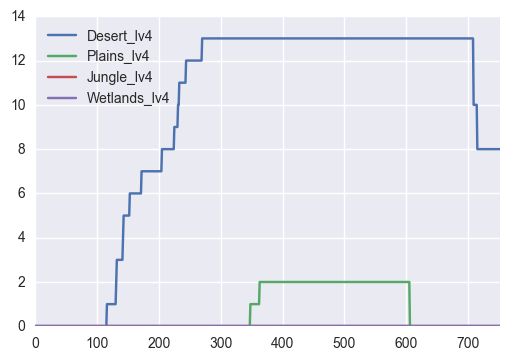

In [34]:
df[df.columns[df.columns.str.contains('lv4') & ~df.columns.str.contains('Dead')]].plot()

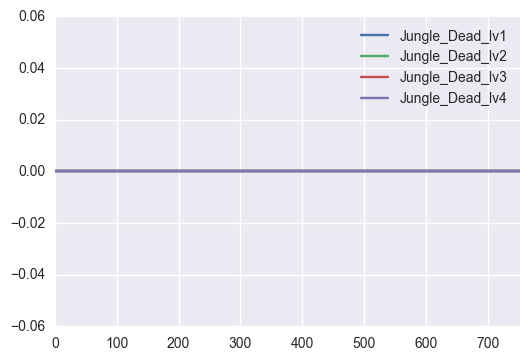

In [35]:
df[df.columns[df.columns.str.contains('Jungle_Dead') & df.columns.str.contains('Dead')]].plot()

In [116]:
path = '/Volumes/Seagate Backup Plus Drive/connected_worlds/'
days = os.listdir(path=path)[-25:]
pds = []
for day in days:
    
    games = os.listdir(path + day)
    for game in games:
        
        if '.DS_Store' in game:
            continue
        files = os.listdir(path + day + '/' + game)
        
        for file in files:
            if '.csv' in file:
            
                df = pd.read_csv(path + day + '/' + game + '/' + file)
                if df.shape[0] > 500:
                    
                    pds.append(df)

In [117]:
df = pd.concat(pds)
df.columns = df.columns.str.strip()
df['index'] = range(df.shape[0])
df = df.set_index('index')
df.head(5)

,Timestamp,Time_Remaining,Total_Water,Total_Alive_Trees,Total_Dead_Trees,Total_Creatures,Desert_Water,MountainValley_Water,Plains_Water,Waterfall_Water,...,MountainValley_PlantIndex,MountainValley_CreatureIndex,Plains_PlantIndex,Plains_CreatureIndex,Jungle_PlantIndex,Jungle_CreatureIndex,Reservoir_PlantIndex,Reservoir_CreatureIndex,Wetlands_PlantIndex,Wetlands_CreatureIndex
index,,,,,,,,,,,,,,,,,,,,,
0,2017-08-23-09-36-14,00:01:59,1.54,0,0,0,0.019878,0.000000,0.000045,1.06920,...,,,,,,,,T20Q13-T21Q70-T23Q2,,
1,2017-08-23-09-36-14,00:19:59,6.00,0,0,0,0.769878,0.207923,0.750045,4.37478,...,,,,,,,,T20Q14-T21Q70-T23Q2,,
2,2017-08-23-09-36-15,00:19:58,6.00,0,0,1,0.768310,0.201384,0.750046,4.14170,...,,T5Q1,,,,,,T20Q14-T21Q70-T23Q2,,
3,2017-08-23-09-36-16,00:19:57,6.00,0,0,1,0.765890,0.193538,0.750046,3.91257,...,,T5Q1,,,,,,T20Q14-T21Q70-T23Q2,,
4,2017-08-23-09-36-18,00:19:56,6.00,0,0,2,0.763516,0.185692,0.750046,3.72440,...,,T5Q2,,,,,,T20Q14-T21Q70-T23Q2,,


In [118]:
diff = df.Desert_Water.diff()
diff[((diff.values > 0) | (diff.values < -0.22))] = 0
diff = diff * -1

arrivals = diff//0.04

In [119]:
import statsmodels.api as sm

In [138]:
y = arrivals.values.astype(np.int8)
cols = ['Desert_lv1','Desert_lv2','Desert_lv3','Desert_lv4']
# X = sm.add_constant(df[cols])
X = df[cols]
# df[cols].mean(axis=0)
X = (X - X.mean(axis=0)) / X.std(axis=0)
X = sm.add_constant(X)

In [139]:
m = Poisson(y.reshape(-1,1), X).fit()
# m.fit(-5e-2*np.ones(4),)

Optimization terminated successfully.
         Current function value: 0.156263
         Iterations 9


In [140]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:               165760
Model:                        Poisson   Df Residuals:                   165755
Method:                           MLE   Df Model:                            4
Date:                Thu, 05 Oct 2017   Pseudo R-squ.:                 0.03585
Time:                        11:40:01   Log-Likelihood:                -25902.
converged:                       True   LL-Null:                       -26865.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4069      0.014   -244.926      0.000      -3.434      -3.380
Desert_lv1     0.0203      0.014      1.434      0.151      -0.007       0.048
Desert_lv2     0.1863      0.017     10.775      0.000       0.152       0.220
Desert_lv3     0.2257      0.017     13.473      0.000       0.193       0.259
Desert_lv4     0.0725      0.011      6.720      0.000       0.051       0.094
==============================================================================
"""

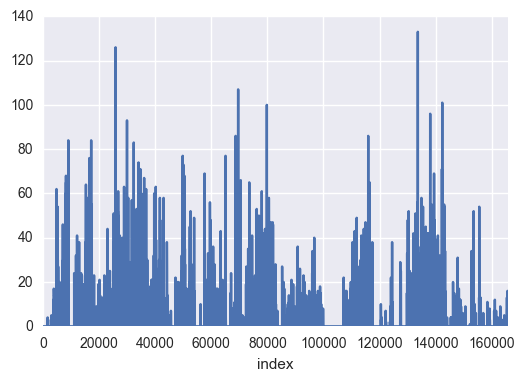

In [129]:
df.Desert_Dead_lv1.plot()

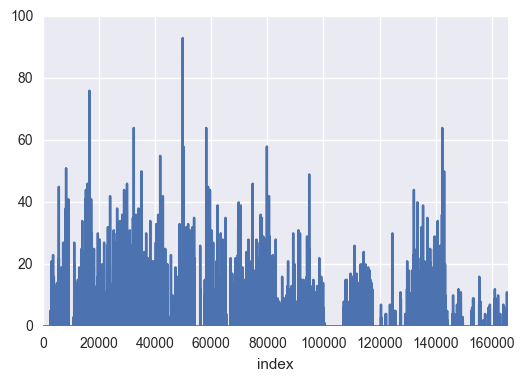

In [130]:
df.Desert_Dead_lv2.plot()

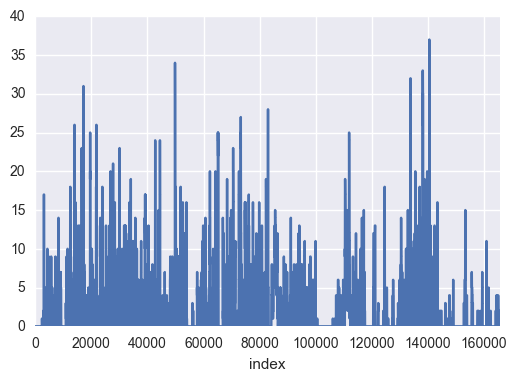

In [131]:
df.Desert_Dead_lv3.plot()

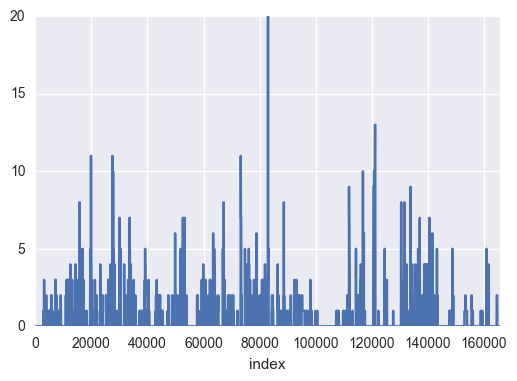

In [132]:
df.Desert_Dead_lv4.plot()

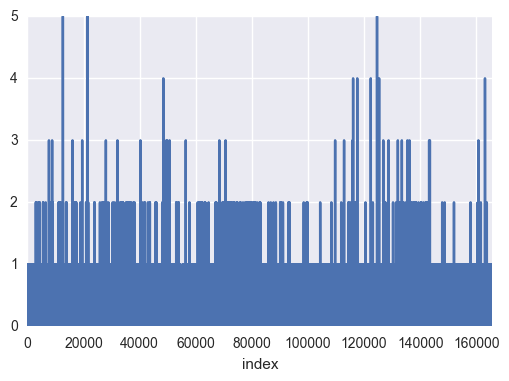

In [135]:
arrivals.plot()